## Sales Data Analysis


In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("MonthlyProductSales.csv", encoding = "ISO-8859-1")

In [ ]:
df

In [5]:
df.head(n=10)

,Month of Order Date,Product Name,Sales
0,2013-05-01,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",208.0
1,2015-06-01,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",208.0
2,2013-11-01,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",333.0
3,2016-07-01,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",416.0
4,2016-11-01,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",500.0
5,2015-08-01,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",1041.0
6,2013-11-01,1/4 Fold Party Design Invitations & White Enve...,6.0
7,2014-11-01,1/4 Fold Party Design Invitations & White Enve...,44.0
8,2014-12-01,3-ring staple pack,4.0
9,2013-01-01,3-ring staple pack,6.0


In [6]:
df.tail(n=10)

,Month of Order Date,Product Name,Sales
9242,2015-07-01,Zipper Ring Binder Pockets,2.0
9243,2015-12-01,Zipper Ring Binder Pockets,3.0
9244,2016-01-01,Zipper Ring Binder Pockets,3.0
9245,2015-11-01,Zipper Ring Binder Pockets,4.0
9246,2014-11-01,Zipper Ring Binder Pockets,6.0
9247,2016-06-01,Zipper Ring Binder Pockets,6.0
9248,2016-07-01,Zipper Ring Binder Pockets,10.0
9249,2013-04-01,Zipper Ring Binder Pockets,14.0
9250,2016-12-01,Zipper Ring Binder Pockets,15.0
9251,2013-07-01,Zipper Ring Binder Pockets,16.0


In [7]:
df.describe()

,Sales
count,9252.000000
mean,248.308798
std,669.441779
min,0.000000
25%,18.000000
50%,60.000000
75%,222.000000
max,22638.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9252 entries, 0 to 9251
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Month of Order Date  9252 non-null   object 
 1   Product Name         9252 non-null   object 
 2   Sales                9252 non-null   float64
dtypes: float64(1), object(2)
memory usage: 217.0+ KB


In [9]:
s = df["Product Name"]

s.value_counts(dropna=False)

Easy-staple paper                                              32
Staples                                                        30
Staple envelope                                                30
Staples in misc. colors                                        18
Avery Non-Stick Binders                                        14
                                                               ..
Xerox 20                                                        1
Cisco Desktop Collaboration Experience DX650 IP Video Phone     1
Cisco SPA 501G IP Phone                                         1
Cisco SPA525G2 5-Line IP Phone                                  1
Panasonic BusinessÊTelephonesÊKX-T7736                          1
Name: Product Name, Length: 1850, dtype: int64

In [10]:
df['Month of Order Date'].str[:4]

0       2013
1       2015
2       2013
3       2016
4       2016
        ... 
9247    2016
9248    2016
9249    2013
9250    2016
9251    2013
Name: Month of Order Date, Length: 9252, dtype: object

In [11]:
df.groupby(df['Month of Order Date'].str[:4]).describe()

Sales                                                   \
                      count        mean         std  min   25%   50%     75%   
Month of Order Date                                                            
2013                 1875.0  258.267200  803.537374  1.0  17.0  55.0  224.00   
2014                 1968.0  239.107215  521.330289  1.0  19.0  62.0  225.25   
2015                 2400.0  253.550833  711.795040  1.0  19.0  58.5  222.00   
2016                 3009.0  243.940512  627.741547  0.0  18.0  60.0  221.00   

                              
                         max  
Month of Order Date           
2013                 22638.0  
2014                  7312.0  
2015                 17500.0  
2016                 14000.0

In [12]:
df.groupby(df['Month of Order Date'].str[:4]).describe().reset_index().rename(columns={"Month of Order Date":"Year of Order Date"})

Year of Order Date   Sales                                                   \
                       count        mean         std  min   25%   50%     75%   
0               2013  1875.0  258.267200  803.537374  1.0  17.0  55.0  224.00   
1               2014  1968.0  239.107215  521.330289  1.0  19.0  62.0  225.25   
2               2015  2400.0  253.550833  711.795040  1.0  19.0  58.5  222.00   
3               2016  3009.0  243.940512  627.741547  0.0  18.0  60.0  221.00   

            
       max  
0  22638.0  
1   7312.0  
2  17500.0  
3  14000.0

In [13]:
yearly_product_sales = df.groupby([df["Month of Order Date"].str[:4], "Product Name"]).sum().reset_index()

In [14]:
yearly_product_sales.rename(columns={"Month of Order Date":"Year"})

,Year,Product Name,Sales
0,2013,"#10 White Business Envelopes,4 1/8 x 9 1/2",156.0
1,2013,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",63.0
2,2013,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",23.0
3,2013,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",541.0
4,2013,1/4 Fold Party Design Invitations & White Enve...,6.0
...,...,...,...
5321,2016,iKross Bluetooth Portable Keyboard + Cell Phon...,67.0
5322,2016,iOttie HLCRIO102 Car Mount,120.0
5323,2016,iOttie XL Car Mount,224.0
5324,2016,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,205.0


In [15]:
df.groupby("Product Name").sum().reset_index()

,Product Name,Sales
0,"""While you Were Out"" Message Book, One Form pe...",25.0
1,"#10 Gummed Flap White Envelopes, 100/Box",42.0
2,#10 Self-Seal White Envelopes,109.0
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",489.0
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.0
...,...,...
1845,iKross Bluetooth Portable Keyboard + Cell Phon...,479.0
1846,iOttie HLCRIO102 Car Mount,216.0
1847,iOttie XL Car Mount,224.0
1848,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,442.0


In [16]:
df.groupby(df['Month of Order Date'].str[:4]).describe()("yearly_product_sales.csv", header=True, index=False, encoding="utf-8")

In [17]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Month of Order Date'>

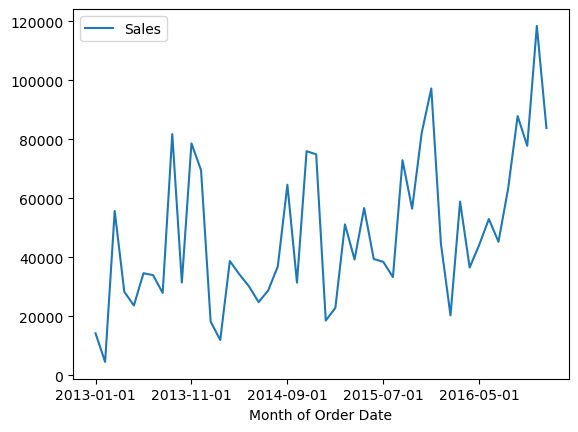

In [18]:
df.groupby(df['Month of Order Date']).sum().plot()

<AxesSubplot:ylabel='Frequency'>

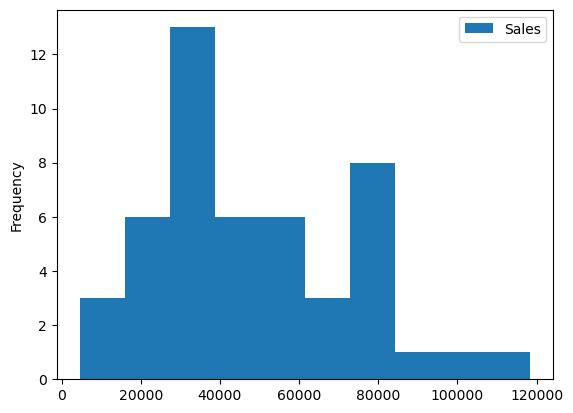

In [19]:
df.groupby(df['Month of Order Date']).sum().plot(kind='hist', bins=10)

<AxesSubplot:ylabel='Month of Order Date'>

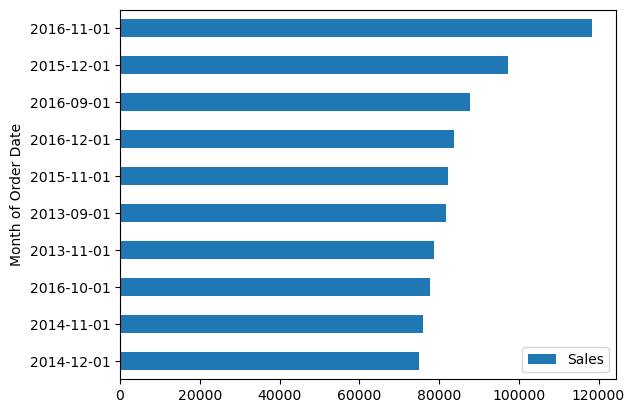

In [20]:
df.groupby(df['Month of Order Date']).sum().sort_values(by='Sales').tail(10).plot(kind='barh')